Statlog (Vehicle Silhouettes) Data Set

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Attribute Information

    compactness: (average perim)^2/area
    circularity: (average radius)^2/area
    distance_circularity: area/(av.distance from border)^2
    radius_ratio: (max.rad-min.rad)/av.radius
    pr.axis_aspect_ratio: (minor axis)/(major axis)
    max.length_aspect_ratio: (length perp. max length)/(max length)
    scatter_ratio: (inertia about minor axis)/(inertia about major axis)
    elongatedness: area/(shrink width)^2
    pr.axis_rectangularity: area/(pr.axis length*pr.axis width)
    max.length_rectangularity: area/(max.length*length perp. to this)
    scaled_variance: (2nd order moment about minor axis)/area along major axis
    scaled_variance.1: (2nd order moment about major axis)/area along minor axis
    scaled_radius_of_gyration: (mavar+mivar)/area
    scaled_radius_of_gyration.1
    skewness_about: (3rd order moment about major axis)/sigma_min^3 major axis
    skewness_about.1: (3rd order moment about minor axis)/sigma_maj^3 minor axis
    skewness_about.2
    hollows_ratio: (area of hollows)/(area of bounding polygon)
    class: van, car, bus



Learning Outcomes

Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

Apply different classifiers and measured their performance
    

In [1]:
### Import the libraries

# import the basic pkgs
import pandas as pd
import numpy as np
%matplotlib inline

# Import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Metrics to evaluate classification models
from sklearn.metrics import (f1_score,
                            recall_score,
                            precision_score,
                            roc_auc_score,
                            accuracy_score,
                            confusion_matrix,
                            classification_report)

random_state = 42
np.random.seed(random_state)

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

### Reading the dataset and displaying first five rows

In [2]:
vehicle = pd.read_csv(r'C:\Users\aryav\Desktop\Kaggle_Competitions\Vehicle Silhouette\vehicle.csv')

In [3]:
vehicle.shape

(846, 19)

The dataset has 846 rows and 19 columns

In [4]:
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.00,83.00,178.00,72.00,10,162.00,42.00,20.00,159,176.00,379.00,184.00,70.00,6.00,16.00,187.00,197,van
1,91,41.00,84.00,141.00,57.00,9,149.00,45.00,19.00,143,170.00,330.00,158.00,72.00,9.00,14.00,189.00,199,van
2,104,50.00,106.00,209.00,66.00,10,207.00,32.00,23.00,158,223.00,635.00,220.00,73.00,14.00,9.00,188.00,196,car
3,93,41.00,82.00,159.00,63.00,9,144.00,46.00,19.00,143,160.00,309.00,127.00,63.00,6.00,10.00,199.00,207,van
4,85,44.00,70.00,205.00,103.00,52,149.00,45.00,19.00,144,241.00,325.00,188.00,127.00,9.00,11.00,180.00,183,bus


### Checking for missing values

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
print('Columns with missing value')
print('--'*40)
missing_val = []

for i in vehicle.columns:
    if vehicle[i].isnull().sum() > 0 :
        print('Column:',i,' ', 'Number of missing value:', vehicle[i].isnull().sum() )
        missing_val.append(i)

Columns with missing value
--------------------------------------------------------------------------------
Column: circularity   Number of missing value: 5
Column: distance_circularity   Number of missing value: 4
Column: radius_ratio   Number of missing value: 6
Column: pr.axis_aspect_ratio   Number of missing value: 2
Column: scatter_ratio   Number of missing value: 1
Column: elongatedness   Number of missing value: 1
Column: pr.axis_rectangularity   Number of missing value: 3
Column: scaled_variance   Number of missing value: 3
Column: scaled_variance.1   Number of missing value: 2
Column: scaled_radius_of_gyration   Number of missing value: 2
Column: scaled_radius_of_gyration.1   Number of missing value: 4
Column: skewness_about   Number of missing value: 6
Column: skewness_about.1   Number of missing value: 1
Column: skewness_about.2   Number of missing value: 1


Observations:

Out of 19 columns we have 14 with missing values.

Some of the columns have hardly 1 or 2 missing values

Columns where number of missing values is >=5 are 'circularity', 'radius_ratio', 'skewness_about'

#### Check for variables with discrete values

In [7]:
for i in vehicle.columns:
    if vehicle[i].nunique() < 846:
        print('Column :', i,'', 'Number of unique values:', vehicle[i].nunique())

Column : compactness  Number of unique values: 44
Column : circularity  Number of unique values: 27
Column : distance_circularity  Number of unique values: 63
Column : radius_ratio  Number of unique values: 134
Column : pr.axis_aspect_ratio  Number of unique values: 37
Column : max.length_aspect_ratio  Number of unique values: 21
Column : scatter_ratio  Number of unique values: 131
Column : elongatedness  Number of unique values: 35
Column : pr.axis_rectangularity  Number of unique values: 13
Column : max.length_rectangularity  Number of unique values: 66
Column : scaled_variance  Number of unique values: 128
Column : scaled_variance.1  Number of unique values: 422
Column : scaled_radius_of_gyration  Number of unique values: 143
Column : scaled_radius_of_gyration.1  Number of unique values: 39
Column : skewness_about  Number of unique values: 23
Column : skewness_about.1  Number of unique values: 41
Column : skewness_about.2  Number of unique values: 30
Column : hollows_ratio  Number o

#### Checking the distribution of the variable 'class'

In [8]:
display(vehicle['class'].value_counts(), vehicle['class'].value_counts(normalize = True))

car    429
bus    218
van    199
Name: class, dtype: int64

car   0.51
bus   0.26
van   0.24
Name: class, dtype: float64

Observation:

The variable 'class' has three unique values - car, bus and van

51% of the data under 'class' variable are cars and 26% and 24% of the data are bus and van respectively

In [9]:
# Mapping class values to numeric values
replace_struc = {'car': 3, 'bus':2, 'van': 1}
vehicle['class'] = vehicle['class'].map(replace_struc)
del replace_struc

#### Replace missing values with the median

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data. 

The SimpleImputer class provides basic strategies for imputing missing values. We will replace missing values with the median of each column in which missing values are located.

In [10]:
from sklearn.impute import SimpleImputer

null_columns = vehicle.columns[vehicle.isnull().any()]; columns = list(vehicle.columns)

print('Descriptive Stats before imputation for columns with missing values: \n', '--'*30)
display(vehicle[null_columns].describe().T)

# Using SimpleImputer to fill missing values by median
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
vehicle = pd.DataFrame(impute.fit_transform(vehicle), columns = columns)

print('Descriptive Stats after imputation: \n', '--'*30)
display(vehicle[null_columns].describe().T)

del null_columns

Descriptive Stats before imputation for columns with missing values: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
circularity,841.00,44.83,6.15,33.00,40.00,44.00,49.00,59.00
distance_circularity,842.00,82.11,15.78,40.00,70.00,80.00,98.00,112.00
radius_ratio,840.00,168.89,33.52,104.00,141.00,167.00,195.00,333.00
pr.axis_aspect_ratio,844.00,61.68,7.89,47.00,57.00,61.00,65.00,138.00
scatter_ratio,845.00,168.90,33.21,112.00,147.00,157.00,198.00,265.00
elongatedness,845.00,40.93,7.82,26.00,33.00,43.00,46.00,61.00
pr.axis_rectangularity,843.00,20.58,2.59,17.00,19.00,20.00,23.00,29.00
scaled_variance,843.00,188.63,31.41,130.00,167.00,179.00,217.00,320.00
scaled_variance.1,844.00,439.49,176.67,184.00,318.00,363.50,587.00,1018.00
scaled_radius_of_gyration,844.00,174.71,32.58,109.00,149.00,173.50,198.00,268.00


Descriptive Stats after imputation: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
circularity,846.00,44.82,6.13,33.00,40.00,44.00,49.00,59.00
distance_circularity,846.00,82.10,15.74,40.00,70.00,80.00,98.00,112.00
radius_ratio,846.00,168.87,33.40,104.00,141.00,167.00,195.00,333.00
pr.axis_aspect_ratio,846.00,61.68,7.88,47.00,57.00,61.00,65.00,138.00
scatter_ratio,846.00,168.89,33.20,112.00,147.00,157.00,198.00,265.00
elongatedness,846.00,40.94,7.81,26.00,33.00,43.00,46.00,61.00
pr.axis_rectangularity,846.00,20.58,2.59,17.00,19.00,20.00,23.00,29.00
scaled_variance,846.00,188.60,31.36,130.00,167.00,179.00,217.00,320.00
scaled_variance.1,846.00,439.31,176.50,184.00,318.25,363.50,586.75,1018.00
scaled_radius_of_gyration,846.00,174.71,32.55,109.00,149.00,173.50,198.00,268.00


### Exploratory Data Analysis

Descriptive statistics 

Check the distribution of numerical variables - skewness and  outliers

Relationship of variables with the target variable - Boxplot of numerical variables in each class

Check the distribution of categorical variables - Count, Percentages

Multivariate Visualization : Scatterplot and Correlation Matrix



#### Descriptive Statistics

In [11]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.00,93.68,8.23,73.00,87.00,93.00,100.00,119.00
circularity,846.00,44.82,6.13,33.00,40.00,44.00,49.00,59.00
distance_circularity,846.00,82.10,15.74,40.00,70.00,80.00,98.00,112.00
radius_ratio,846.00,168.87,33.40,104.00,141.00,167.00,195.00,333.00
pr.axis_aspect_ratio,846.00,61.68,7.88,47.00,57.00,61.00,65.00,138.00
max.length_aspect_ratio,846.00,8.57,4.60,2.00,7.00,8.00,10.00,55.00
scatter_ratio,846.00,168.89,33.20,112.00,147.00,157.00,198.00,265.00
elongatedness,846.00,40.94,7.81,26.00,33.00,43.00,46.00,61.00
pr.axis_rectangularity,846.00,20.58,2.59,17.00,19.00,20.00,23.00,29.00
max.length_rectangularity,846.00,148.00,14.52,118.00,137.00,146.00,159.00,188.00


#### We will plot the histogram and understand the data distribution for each column

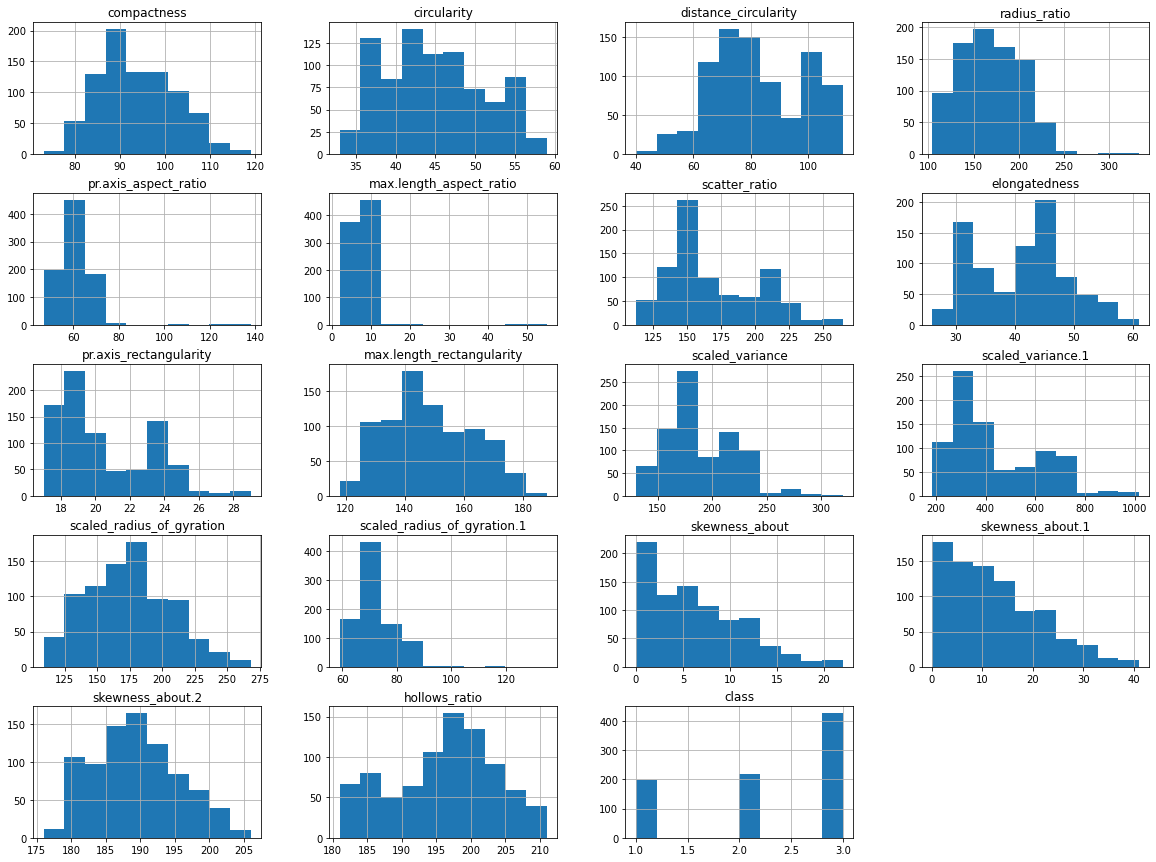

In [12]:
#plt.figure(figsize = (20,15))
vehicle.hist(figsize = (20,15))
plt.show()

The distribution for the following columns are skewed to the right - pr.axis_aspect_ratio , max.length_aspect_ratio ,scaled_radius_of_gyration_1, skewness_about and skewness_about_1

Elongatedness and pr.axis_rectangularity have bimodal distribution - there are two peaks.

In the column pr.axis_aspect_ratio, most of the values lie between 58 and 65 while only handful of them are above 120.

In the column max.length_aspect_ratio, most of the values lie between 2 and 12 while only handful of them are above 40.

#### Correlation and Scatterplot  Matrix between variables to understand the relationship

In [13]:
# Define the function below to plot the correlation matrix
def correlation_matrix(df, threshold = 0.8):
    corr = vehicle.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    #Return thr indices for the upper triangle of an array
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
    ax.set_title('Correlation matrix of data')
    
    sort = corr.abs().unstack()
    sort = sort.sort_values(ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

scaled_variance.1            scatter_ratio                 0.99
scatter_ratio                scaled_variance.1             0.99
pr.axis_rectangularity       scatter_ratio                 0.99
scatter_ratio                pr.axis_rectangularity        0.99
scaled_variance.1            pr.axis_rectangularity        0.99
pr.axis_rectangularity       scaled_variance.1             0.99
scatter_ratio                elongatedness                 0.97
elongatedness                scatter_ratio                 0.97
max.length_rectangularity    circularity                   0.96
circularity                  max.length_rectangularity     0.96
elongatedness                scaled_variance.1             0.95
scaled_variance.1            elongatedness                 0.95
pr.axis_rectangularity       elongatedness                 0.95
elongatedness                pr.axis_rectangularity        0.95
scaled_variance              scatter_ratio                 0.95
scatter_ratio                scaled_vari

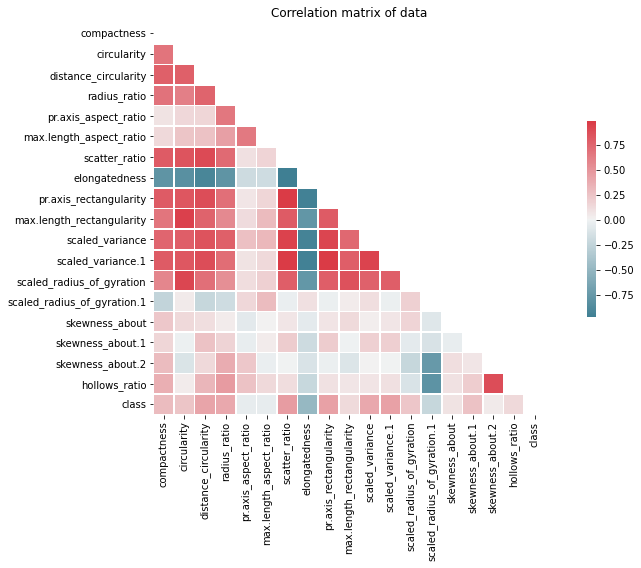

In [14]:
correlation_matrix(vehicle, threshold = 0.8)

Observation :

scatter_ratio and pr.axis_rectangularity; scaled_variance.1 and scatter_ratio; pr.axis_rectangularity and scaled_variance.1; pr.axis_rectangularity and scaled_variance.1; elongatedness and scatter_ratio; circularity and max.length_rectangularity; scaled_variance and scatter_ratio; elongatedness and pr.axis_rectangularity; elongatedness and scaled_variance.1; elongatedness and scaled_variance; pr.axis_rectangularity, scaled_variance and scaled_variance.1; distance_circularity and elongatedness; circularity and scaled_radius_of_gyration; distance_circularity and elongatedness; scatter_ratio and distance_circularity are strongly correlated with each other with a correlation coeff greater than 0.9
    

#### Correlation of independent variables with the target variable - 'class'

In [15]:
# Absolute correlation of independent variables with the target variable
AbsCorrDep= []
# List of all independent variables
AllVars = vehicle.columns.to_list()[:-1]

for i in AllVars:
    AbsCorrDep.append(round(abs(vehicle['class'].corr(vehicle[i])),2))
    
df_corr = pd.DataFrame(AbsCorrDep, columns = ['Correlation with the target variable'], index = AllVars)

display(df_corr.sort_values(by = 'Correlation with the target variable', ascending = False))




,Correlation with the target variable
elongatedness,0.48
scatter_ratio,0.46
pr.axis_rectangularity,0.44
scaled_variance.1,0.44
distance_circularity,0.43
scaled_variance,0.41
radius_ratio,0.40
compactness,0.30
skewness_about.1,0.27
scaled_radius_of_gyration,0.25


Observation:

'elongatedness', 'scatter_ratio', 'pr.axis_rectangularity','scaled_variance.1' are some of the variables which have relatively strong correlation with the 'class' variable. 

Indeed highly correlated variables ------------------------------------------------------------


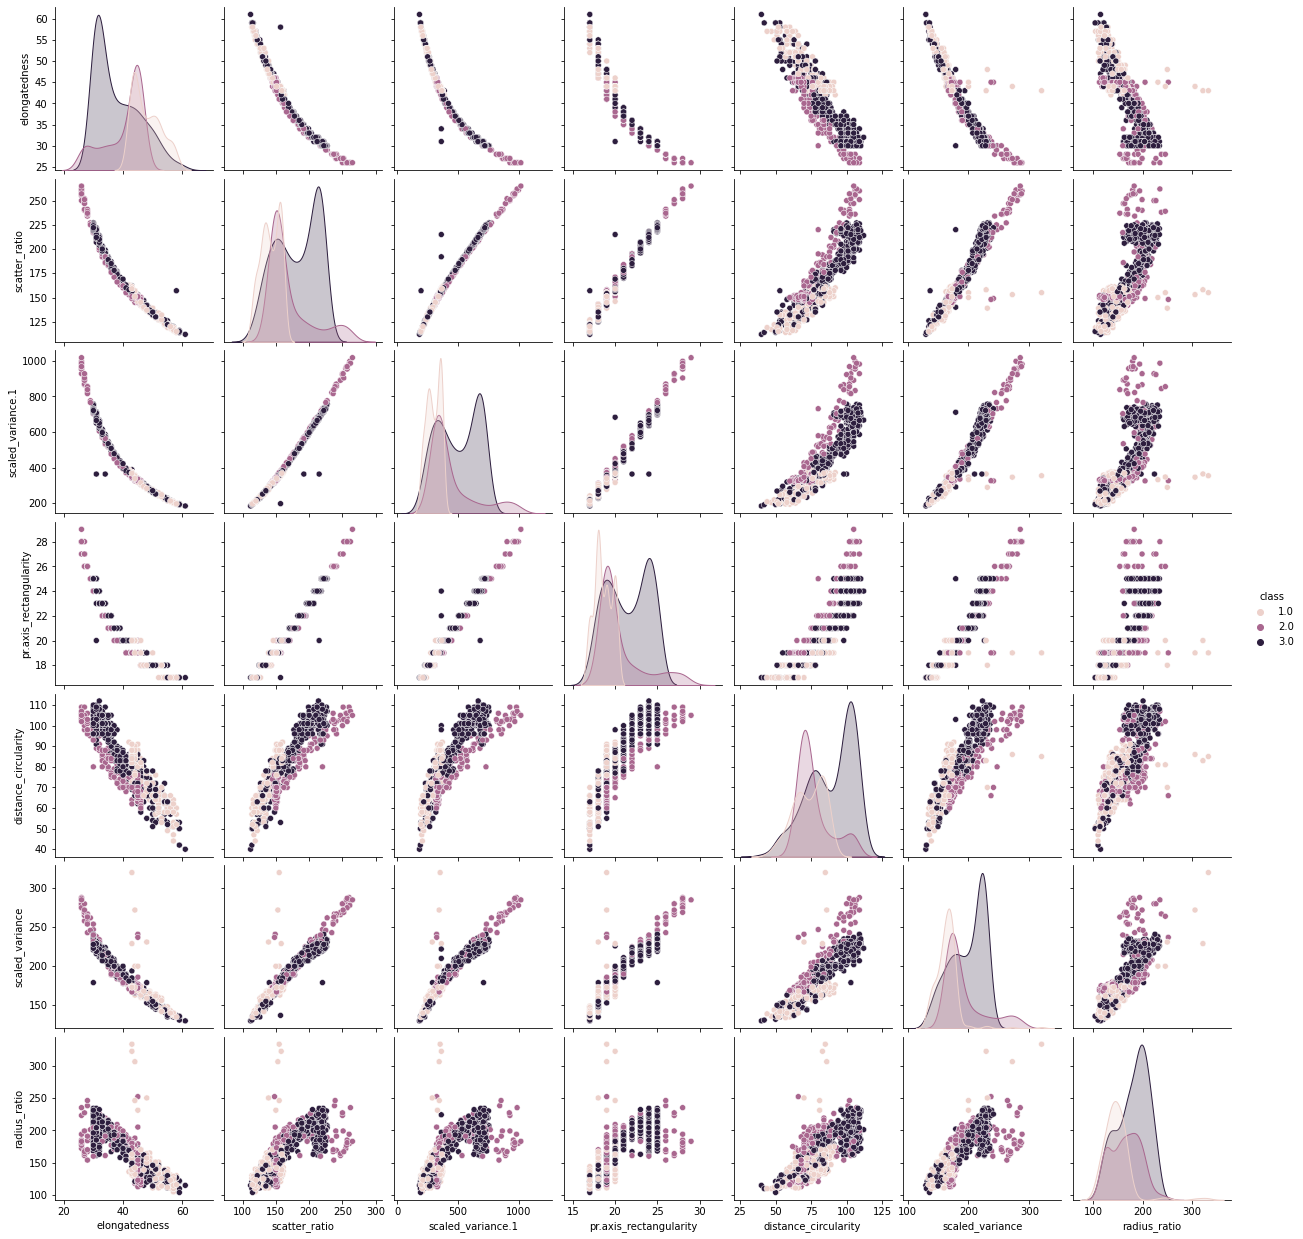

In [16]:
print('Indeed highly correlated variables', '--'*30)
sns.pairplot(vehicle[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'distance_circularity','scaled_variance','radius_ratio', 'class']], hue = 'class')

#### Boxplot distribution of numerical variables

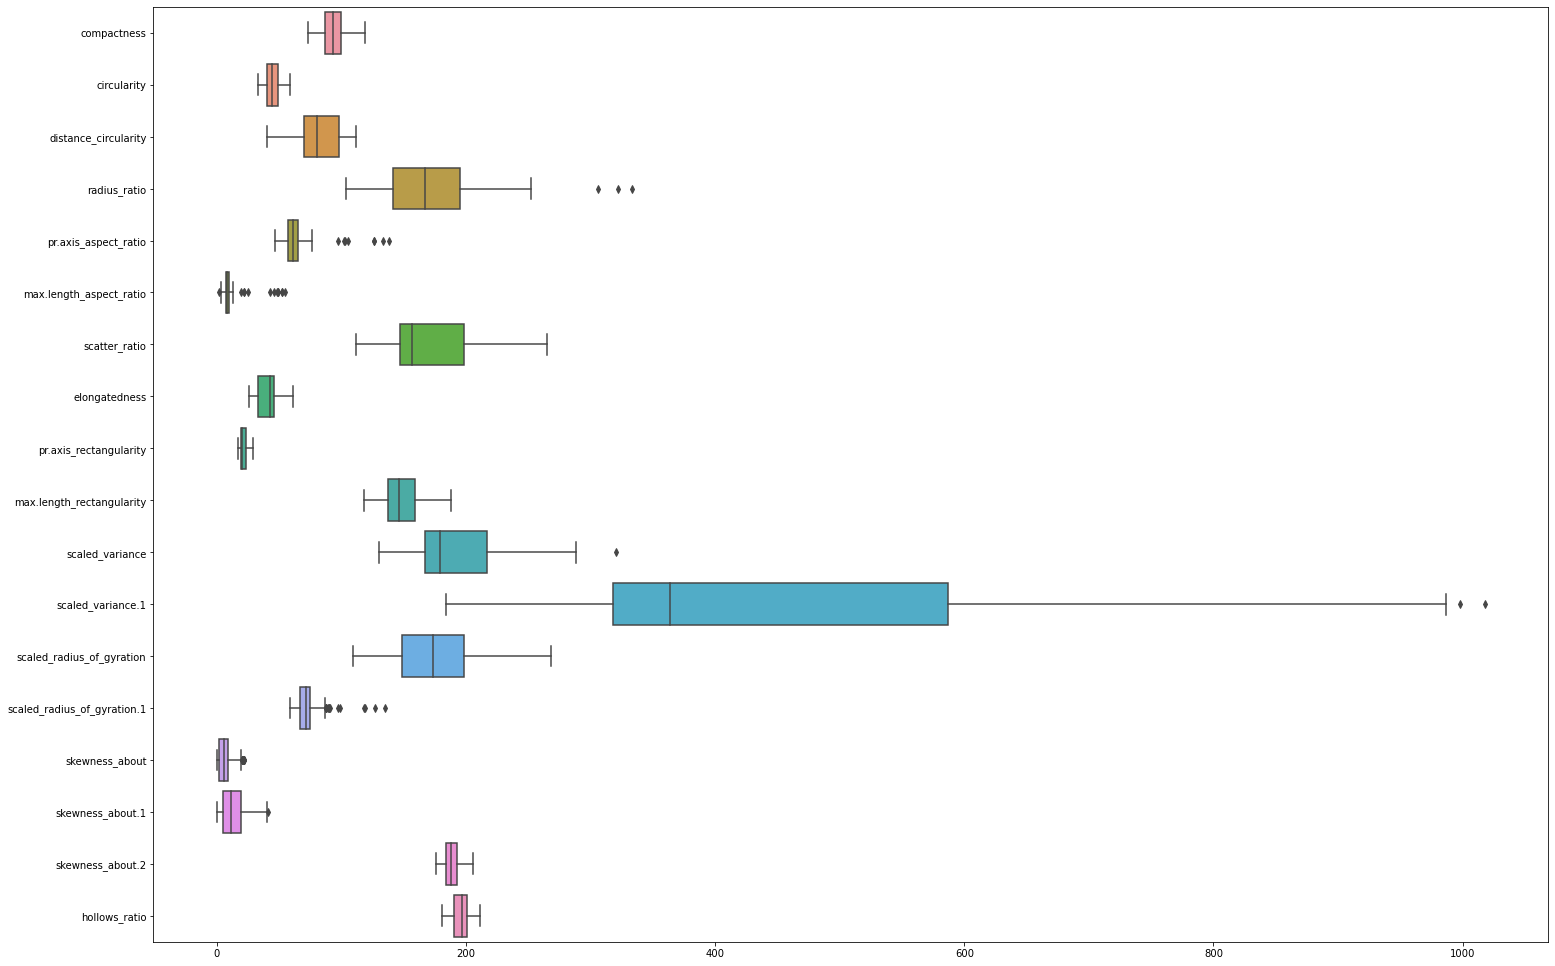

In [17]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (25, 17.2))
ax = sns.boxplot(data = vehicle.iloc[:, 0:18], orient = 'h')

Observations:

Out of all the variables , 'scaled_variance.1' has the largest dispersion.

There are few columns that have outliers. Those columns are 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about' and 'skewness_about.1'.

It appears that scaled_radius_of_gyration.1 has maximum outliers around 15 of them, which represents about 1.77% of number of rows.

The outliers can be due to data entry, natural variation or sampling problems.


#### Boxplot distribution of numerical variables grouped under target variable

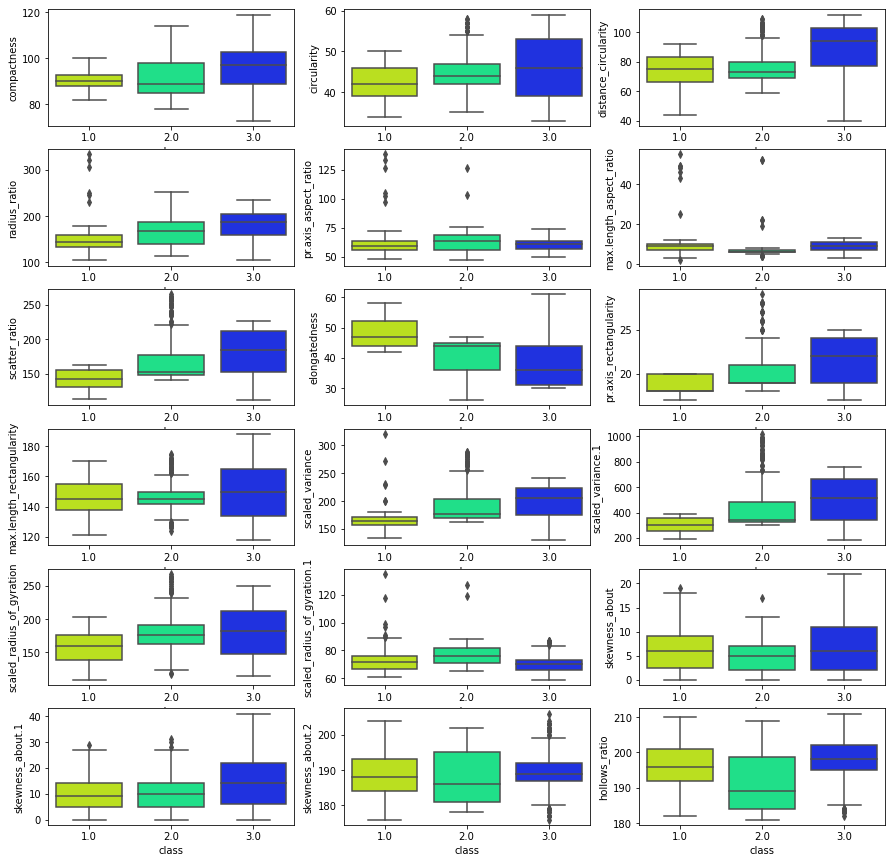

In [18]:
fig, ax = plt.subplots(6,3, figsize = (15,15))
for idx, col in enumerate(vehicle.columns.to_list()[:-1]):
        ax = plt.subplot(6,3, idx+1)
        sns.boxplot(data = vehicle, x = 'class', y = col, palette="gist_rainbow")
    

Observations:

For the following columns- 'circularity', 'distance_circularity', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity' , 'max.length_rectangularity', 'scaled_variance.1', 'scaled_radius_of_gyration', 'skewness_about', and 'skewness_about.1' , the dispersion under the 'car' is large as compared to 'van' and 'bus'. 

For the following columns - 'skewness_about.2' and 'hollows_ratio' , the dispersion under the 'bus' class is large as compared to 'car' and 'van'.

The median value for the class 'car' is comparatively higher than 'van' and 'bus' under the column 'distance_circularity'

The median value for the class 'car' is comparatively higher than 'van' and 'bus' under the column 'scaled_variance.1'

Under the column 'elongatedness' , the 'car' class has the  median on the lower end  and under the column 'hollows_ratio' the 'bus' class has the median on the lower end

### PCA

Steps performed:

Split the data into training set and test set. We will scale the data before performing PCA.

Create the covariance matrix. It is a square matrix that gives the covariance between each pair of elements.

Perform Singular Value Decomposition on the covariance matrix . This will give us the matrix of eigenvectors and diagonal matrix of eigenvalues. The eigenvectors are unit vectors that represent the directions of the data and the eigenvalues are the corresponding magnitude (or how importanat the each direction is).

Finding variance and cumulative variance by each eigen vector.By identifying which “directions” are most “important,” we can compress or project our data into a smaller space by dropping the “directions” that are the “least important” .By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space

We will transform our original data to align with these important directions. We will use PCA from sklearn and find Principal Components. Transform data to components formed.




In [19]:
from sklearn.model_selection import train_test_split
X = vehicle.drop('class', axis = 1)
y = vehicle['class']


In [20]:
# Splitting the dataset into training set and test set with the ratio 85:25 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, 
                                                    random_state = random_state, shuffle = False)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
display(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(634, 18)

(634,)

(212, 18)

(212,)

#### Generate covariance matrix

In [23]:
cov_matrix = np.cov(X_train_scaled.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00157978  0.6927466   0.79399868  0.68648507  0.08991307  0.14900705
   0.81440645 -0.78865303  0.81671979  0.69148473  0.76401366  0.81521551
   0.60642949 -0.23258692  0.23596746  0.15335327  0.30032346  0.35842144]
 [ 0.6927466   1.00157978  0.79605498  0.62627988  0.15932517  0.24678394
   0.8488418  -0.82596821  0.84312815  0.96175053  0.79699299  0.83574638
   0.92861027  0.05035261  0.12602084 -0.01596743 -0.08976585  0.05150518]
 [ 0.79399868  0.79605498  1.00157978  0.76200842  0.15106234  0.2611407
   0.90803691 -0.91408309  0.89550696  0.78675007  0.86059449  0.88875573
   0.71342179 -0.21200929  0.11139404  0.27719306  0.15789972  0.34211554]
 [ 0.68648507  0.62627988  0.76200842  1.00157978  0.66601191  0.46985217
   0.72927675 -0.78131919  0.70516852  0.58180799  0.79857796  0.71255947
   0.54994993 -0.13237858  0.04695328  0.18360022  0.37349416  0.4558452 ]
 [ 0.08991307  0.15932517  0.15106234  0.66601191  1.00157978  0.68360988
   0.09727747

In [24]:
# The following code generates eignevector and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)


Eigen Vectors 
 [[ 2.75843338e-01  1.28391618e-01  9.77960344e-02 -9.53573505e-02
  -6.58272843e-02  1.75071333e-01  4.66911327e-01  5.90183792e-01
   4.46905052e-01  2.30972735e-01 -3.44573140e-02  6.00072865e-03
  -1.37326479e-02  1.52933825e-01 -1.04585693e-02  6.39502284e-02
  -7.05046005e-02  2.04831798e-02]
 [ 2.93159350e-01 -1.20986844e-01  4.15981761e-02 -1.82971648e-01
   8.91068891e-02 -3.19442690e-01 -2.39605121e-01  1.88013378e-01
  -7.48234615e-04 -1.20363487e-01 -2.78784843e-02  2.33417952e-01
  -1.45557073e-02  5.15393126e-02  6.12637153e-02 -4.55220045e-01
  -1.57855583e-01  5.94098701e-01]
 [ 3.04636209e-01  7.89962555e-02  4.94048958e-02  7.40728244e-02
  -4.84633146e-02 -1.42434100e-01  8.67115942e-02 -4.06808631e-01
   1.63861149e-01  2.66224384e-01 -6.86003968e-01  2.66366896e-02
   1.15417465e-02 -2.41060920e-01 -2.07132515e-02  1.73251417e-01
   9.82753528e-02  1.73195971e-01]
 [ 2.66886113e-01  1.62801677e-01 -2.97952322e-01  4.07176682e-02
   5.44548212e-02  2.

We can also use np.linalg.svd to obtain all principle components. The standard factorization technique decompose the training set into matrix multiplication of three matrices (U, s and V) where V contains the unit vectors that defines all the principal components we are looking for.

In [25]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 52.27939353  68.76274261  79.77058494  86.21576792  91.36923697
  94.25712337  96.14971203  97.3271283   98.21089833  98.69335799
  99.07620412  99.33825889  99.53215019  99.69129903  99.81210238
  99.9169947   99.97936743 100.        ]


Text(0, 0.5, 'Variance explained ')

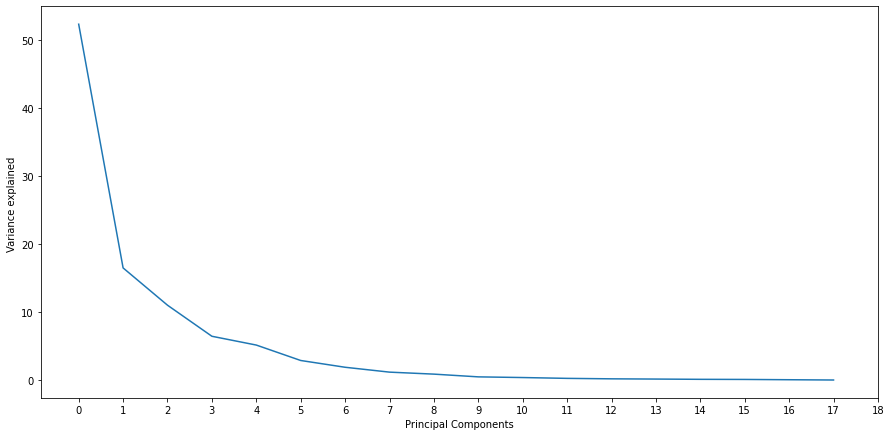

In [26]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)
plt.xticks(range(0,19))
plt.xlabel("Principal Components")
plt.ylabel("Variance explained ")


Observation:

There is a steep drop in variance explained with increase in the number of components
    

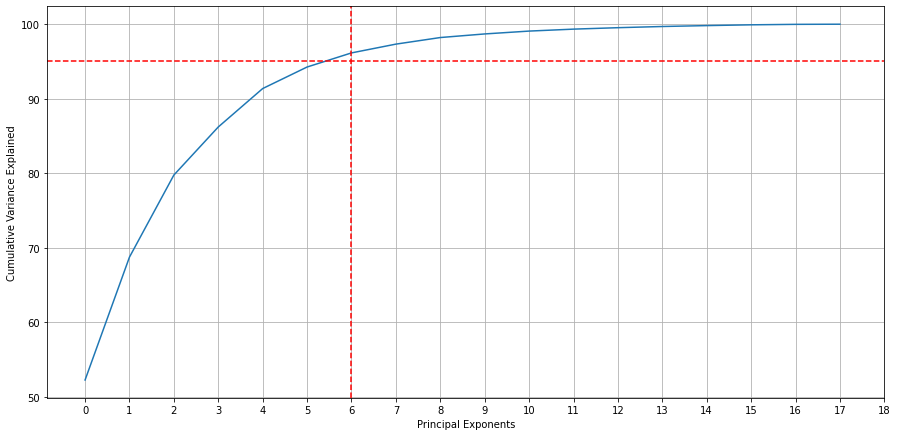

In [27]:
plt.figure(figsize = (15, 7.2))

plt.plot(cum_var_exp)
plt.xticks(range(0,19))
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 6, color = 'r', linestyle = '--')
plt.xlabel('Principal Exponents')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.fit_transform(X_test_scaled)
display(X_train_reduced.shape, X_test_reduced.shape)

(634, 7)

(212, 7)

In [29]:
pca.components_

array([[ 0.28190387,  0.29225261,  0.31022986,  0.26039613,  0.06167749,
         0.07804681,  0.32152411, -0.31402172,  0.31717629,  0.2712106 ,
         0.30762364,  0.32018279,  0.27442854, -0.02974117,  0.05599343,
         0.05694646,  0.01851089,  0.07046562],
       [-0.13823628,  0.13030663, -0.06590242, -0.23368077, -0.20522473,
        -0.0500493 ,  0.05136875,  0.01983582,  0.06591249,  0.1270168 ,
         0.04681382,  0.05693757,  0.22889067,  0.42555469,  0.00299422,
        -0.03064726, -0.55578856, -0.53671104],
       [ 0.10874844,  0.14930234, -0.04394118, -0.12021869, -0.15312211,
        -0.10728702, -0.06203528,  0.06897112, -0.05603966,  0.13651191,
        -0.13328294, -0.06071829,  0.16492836, -0.11435203,  0.77208323,
        -0.46401867,  0.08641892,  0.05948221],
       [-0.22933802,  0.14476008, -0.06983444,  0.20726683,  0.50396992,
         0.53130587, -0.1028985 ,  0.0498409 , -0.12440503,  0.1512927 ,
        -0.01074125, -0.11994284,  0.15496115,  0.176

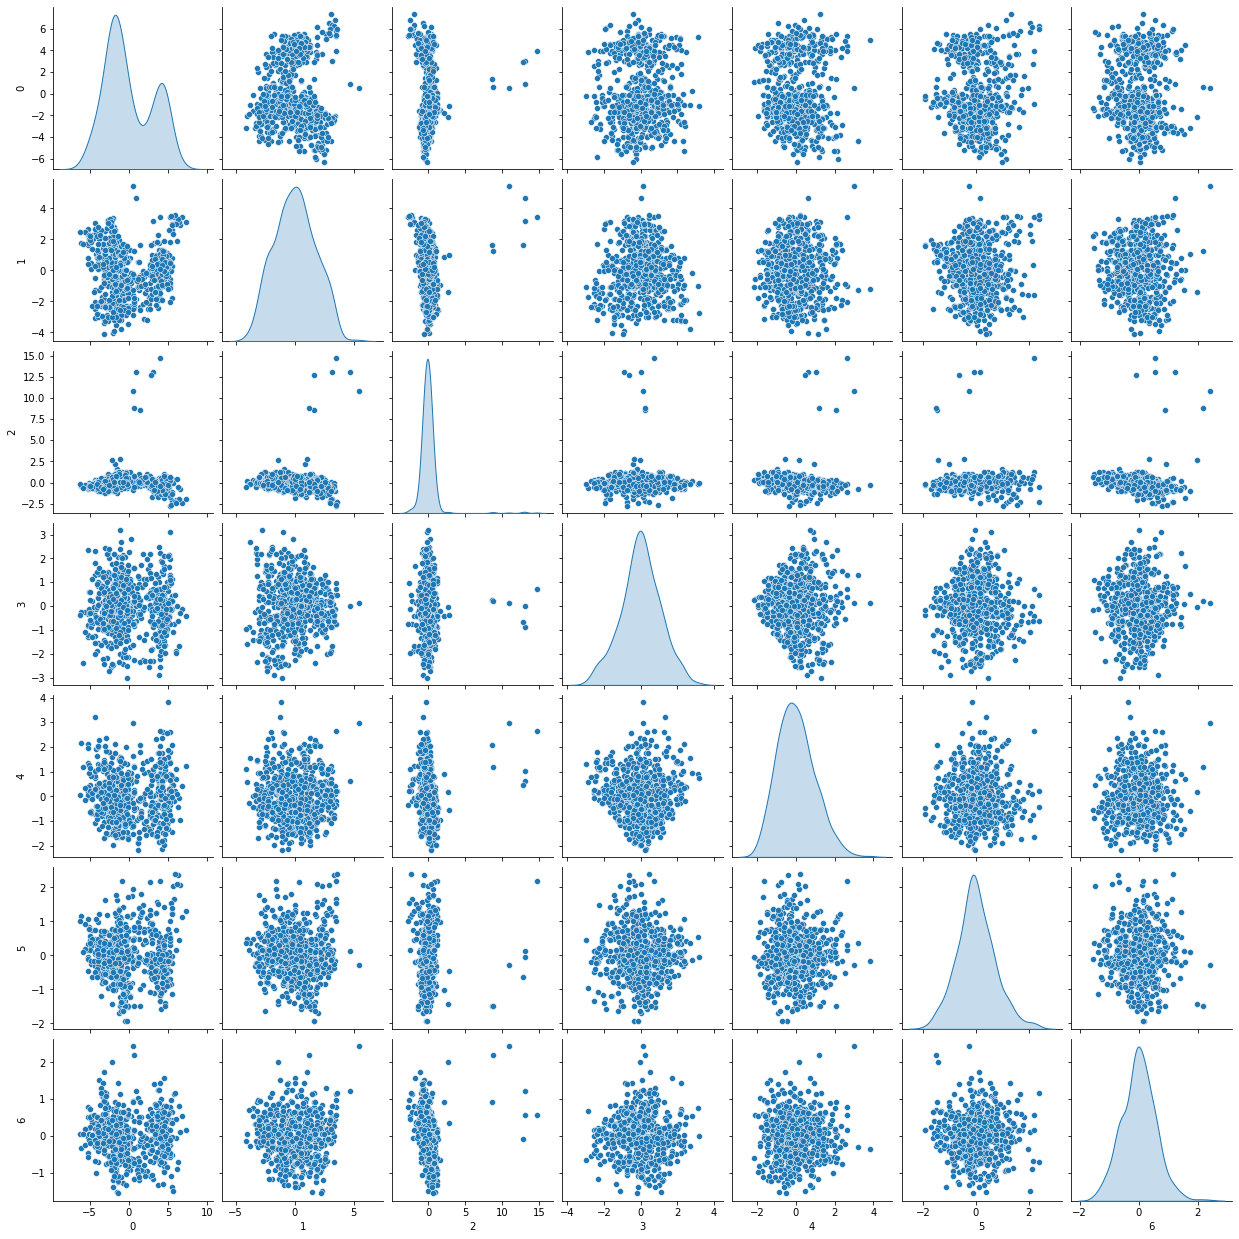

In [30]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(X_train_reduced), diag_kind = 'kde')

In [31]:
# Creating a dimension reduced with features and target
df_train = pd.DataFrame(X_train_reduced).join(pd.DataFrame(y_train, columns = ['class']), how = 'left', sort = False)
df_test = pd.DataFrame(X_test_reduced).join(pd.DataFrame(y_test, columns = ['class']), how = 'left', sort = False)
df_train.shape, df_test.shape

((634, 8), (212, 8))

#### Boxplot graph to understand the distribution of principal components for each group of the target variable- 'car', 'bus' and 'van'

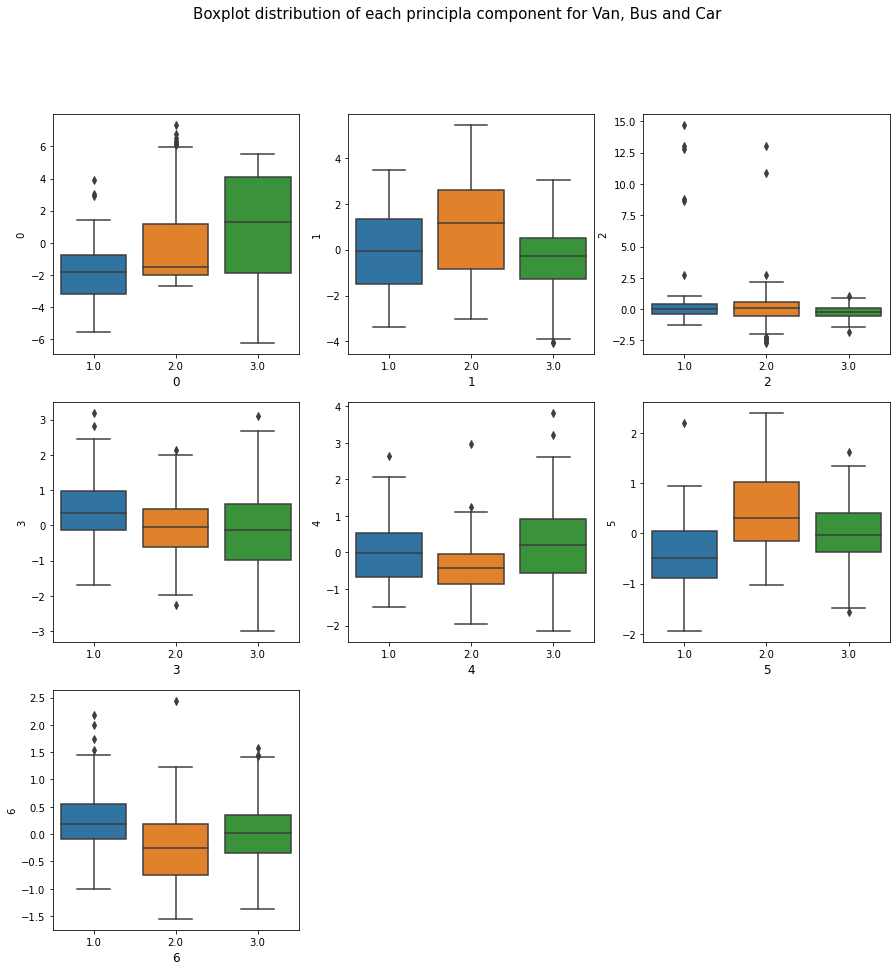

In [32]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
fig.suptitle('Boxplot distribution of each principla component for Van, Bus and Car', fontsize = 15)

for idx, cols in enumerate(df_train.columns[:-1].to_list()):
    plt.subplot(3,3,idx+1)
    sns.boxplot(data = df_train, x = 'class', y = cols)
    plt.xlabel(cols, fontsize = 12)
    
plt.subplot(3,3,8).set_visible(False)
plt.subplot(3,3,9).set_visible(False)
    
plt.show()

In [33]:

# Helper function for PCA plots
def pca_plots(df, col1, col2, xlabel, ylabel, ax):
    ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} vs {ylabel}', fontsize = 14)
    targets = [3, 2, 1]; colors = ['r', 'g', 'b']
    for target, color in zip(targets, colors):
        indicesToKeep = df['class'] == target
        ax.scatter(df.loc[indicesToKeep, col1], df.loc[indicesToKeep, col2], c = color, s = 50)
    ax.legend(targets)

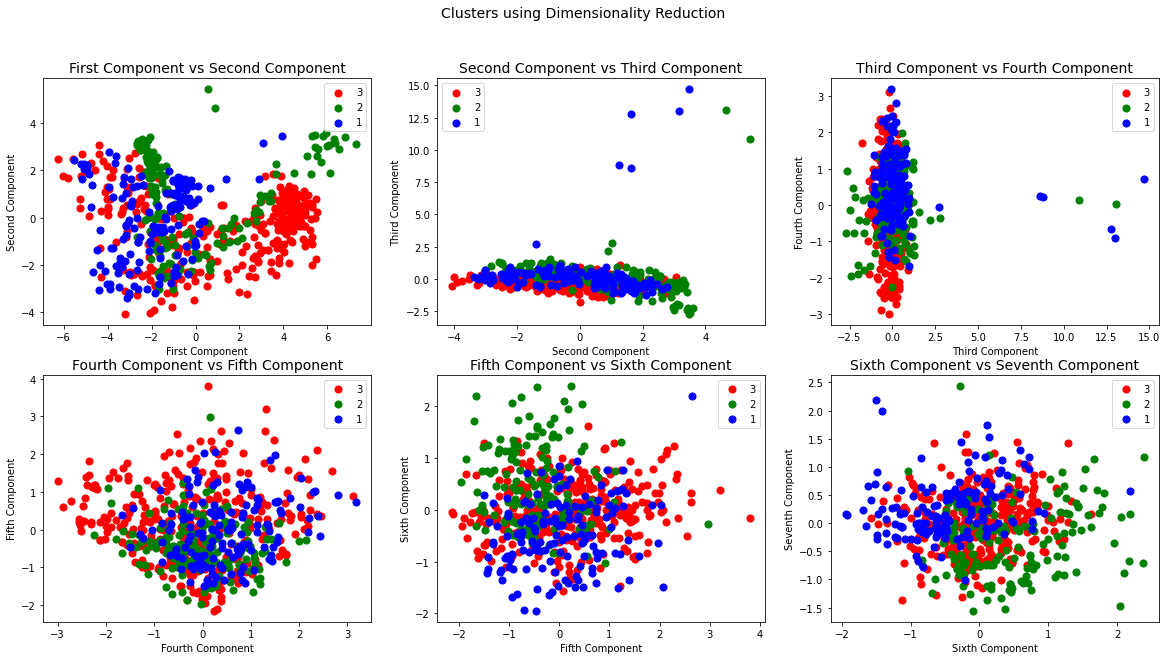

In [34]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 10))
f.suptitle('Clusters using Dimensionality Reduction', fontsize = 14)

pca_plots(df_train, 0, 1, 'First Component', 'Second Component', ax1)
pca_plots(df_train, 1, 2, 'Second Component', 'Third Component', ax2)
pca_plots(df_train, 2, 3, 'Third Component', 'Fourth Component', ax3)
pca_plots(df_train, 3, 4, 'Fourth Component', 'Fifth Component', ax4)
pca_plots(df_train, 4, 5, 'Fifth Component', 'Sixth Component', ax5)
pca_plots(df_train, 5, 6, 'Sixth Component', 'Seventh Component', ax6)


Observation

We do see few clusters but there is way too much overlap

#### Modeling

We will implement the following classification models on our reduced dataset - NaiveBayes, Logistic Regression, KNN, Decision Tree, Random Forest and SVM

We will perform cross validation on each of the models and measure the statistics (mean, standard deviation) of 'f1_score' on each fold. We will use 10 folds to evaluate the score.

We will analyze the performance of each model using boxplot graph.

Further tune the best performing models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('Naive BAyes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('CART', DecisionTreeClassifier()))


In [36]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = True)
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv = skf, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.797195 (0.065865)
Naive BAyes: 0.697192 (0.068384)
KNN: 0.860446 (0.046059)
Random Forest: 0.875399 (0.050448)
SVC: 0.896299 (0.042740)
CART: 0.785089 (0.058598)


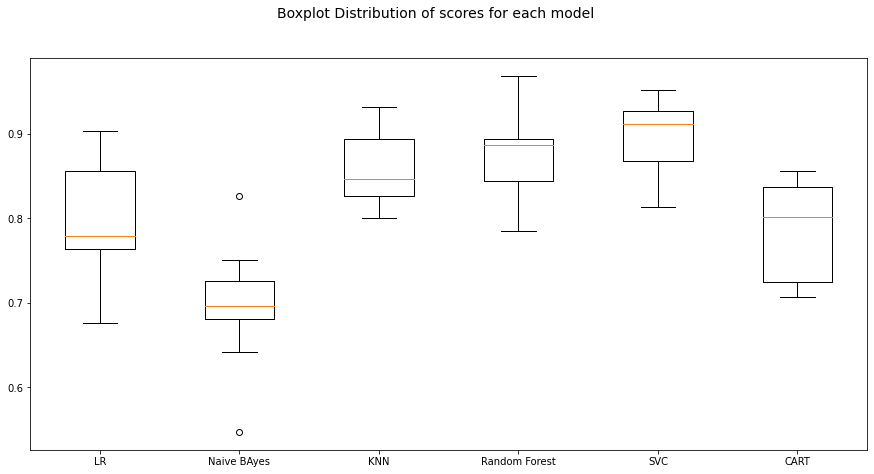

In [37]:
fig = plt.figure(figsize = (15, 7.2))
fig.suptitle(f'Boxplot Distribution of scores for each model', fontsize = 14)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observation:

Logistic Regression has the highest dispersion

Naive Bayes has the lowest scores.

RandomForest and SVC are the top two models that have high scores

We will tune the models and see which of them performs better.

#### Random Forest Classifier

In [38]:
rndm_forest = RandomForestClassifier(n_jobs = -1, random_state = 42)
params = {'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)],
         'max_depth' : [int(x) for x in np.linspace(10,110, 10)],
         'min_samples_split' :[2,5,10],
          'bootstrap': [True,False]
         }

In [39]:
from sklearn.model_selection import RandomizedSearchCV
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)

rfc_grid = RandomizedSearchCV(rndm_forest, param_distributions = params, cv = skf, n_jobs = -1, scoring = scoring)
rfc_grid.fit(X_train_reduced, y_train)

print(rfc_grid.best_estimator_)
print(rfc_grid.best_params_)

RandomForestClassifier(bootstrap=False, max_depth=32, n_estimators=410,
                       n_jobs=-1, random_state=42)
{'n_estimators': 410, 'min_samples_split': 2, 'max_depth': 32, 'bootstrap': False}


In [40]:
rndm_clf_tuned = RandomForestClassifier(bootstrap=False, max_depth=32, n_estimators=410,
                       n_jobs=-1, random_state=42)
rndm_clf_tuned.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=False, max_depth=32, n_estimators=410,
                       n_jobs=-1, random_state=42)

In [41]:
y_pred_train = rndm_clf_tuned.predict(X_train_reduced)
y_pred_test = rndm_clf_tuned.predict(X_test_reduced)
print('Scores for Tuned Random Forest Classifier\n\n')
print('Accuracy Score for training set : {0:.3f}'.format(accuracy_score(y_pred_train, y_train)))
print('Accuracy Score for test set : {0:.3f}'.format(accuracy_score(y_pred_test, y_test)))

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
rndm_clf_score = cross_val_score(rndm_clf_tuned, X_train_reduced, y_train, cv = skf, scoring = scoring)
print('Random Forest Classifier training score is : {0:.2f}'.format(round(rndm_clf_score.mean(),2)))

# Classification Report
print('\n{}'.format(classification_report(y_pred_test, y_test)))

Scores for Tuned Random Forest Classifier


Accuracy Score for training set : 1.000
Accuracy Score for test set : 0.769
Random Forest Classifier training score is : 0.88

              precision    recall  f1-score   support

         1.0       0.78      0.83      0.80        46
         2.0       0.62      0.73      0.67        45
         3.0       0.84      0.76      0.80       121

    accuracy                           0.77       212
   macro avg       0.74      0.77      0.76       212
weighted avg       0.78      0.77      0.77       212



In [42]:
def model_cnf_mtrx(y_pred, y):
    cm = confusion_matrix(y_pred, y)
    
    labels = np.asarray([ ["{0:0.0f}".format(item) + '\n{0:.2%}'.format(item/cm.flatten().sum())]
                         for item in cm.flatten()]).reshape(3,3)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = '')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

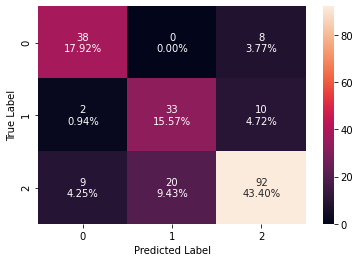

In [43]:
model_cnf_mtrx(y_pred_test, y_test)

#### Support Vector Machine

In [44]:
svc_clf = SVC(random_state = random_state)
params = {'kernel': ['linear', 'rbf'],
         'C':[0.01,0.05, 0.5, 1]}


In [45]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
svc_grid = GridSearchCV(svc_clf, param_grid = params, cv = skf, scoring = scoring, n_jobs = -1)

svc_grid.fit(X_train_reduced, y_train)

print(svc_grid.best_estimator_)
print(svc_grid.best_params_)


SVC(C=1, random_state=42)
{'C': 1, 'kernel': 'rbf'}


In [46]:
y_pred_train = svc_grid.predict(X_train_reduced)
y_pred_test = svc_grid.predict(X_test_reduced)
print('Scores for tuned Support Vector Machine \n')
print('Accuracy Score for training set : {:.3f}'.format(accuracy_score(y_pred_train, y_train)))
print('Accuracy Score for test set : {:.3f}'.format(accuracy_score(y_pred_test, y_test)))

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
svc_clf_score = cross_val_score(svc_grid, X_train_reduced, y_train, cv = skf, scoring = scoring)
print(' SVM Classifier training score is : {:.2f}'.format(round(svc_clf_score.mean(),2)))

# Classification Report
print('\n{}'.format(classification_report(y_pred_test, y_test)))


Scores for tuned Support Vector Machine 

Accuracy Score for training set : 0.937
Accuracy Score for test set : 0.783
 SVM Classifier training score is : 0.90

              precision    recall  f1-score   support

         1.0       0.82      0.80      0.81        50
         2.0       0.64      0.76      0.69        45
         3.0       0.84      0.79      0.81       117

    accuracy                           0.78       212
   macro avg       0.76      0.78      0.77       212
weighted avg       0.79      0.78      0.79       212



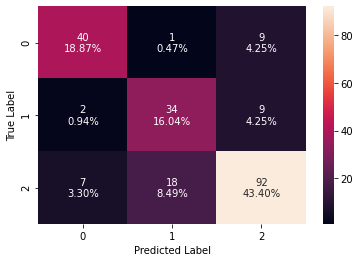

In [47]:
model_cnf_mtrx(y_pred_test, y_test)

Observation:

Instead of looking at scores for each class in our classification report, we will look at the macro average scores to understand the overall performance. Macro average is the aritmetic mean of all the scores and weighted average accounts for the contribution of each class as weighted by the number of occurences of that given class. As all classes are equally important, using macro average would be good choice because it treats all classes equally.

In the above classification reports the Random Forest classifier and Support Vector Machine classifier have average precision score of 74% and 76% , recall score of 77% and 78% , accuracy score of 77% and 78% respectively.

We will implement the tuned support vector classifier on our data set with original features.

#### Tuned SVC classifier on data set with original features

In [48]:
# SVC with hyperparameter tuning -- Original Features
svc = SVC(random_state = random_state)

params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}

skf = StratifiedKFold(n_splits = 10)
grid_svc_f = GridSearchCV(svc, param_grid = params, n_jobs = -1, cv = skf)

grid_svc_f.fit(X_train, y_train)

print('SVC Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', grid_svc_f.best_params_)
print('Best Score is: ', grid_svc_f.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(grid_svc_f.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(grid_svc_f.score(X_test, y_test)))

y_true, y_pred = y_test, grid_svc_f.predict(X_test)

# Cross Validation Score
grid_svc_f_score = cross_val_score(grid_svc_f, X_train, y_train, cv = skf, scoring = scoring)
print('SVC cross validation training score: ', round(grid_svc_f_score.mean(), 3).astype(str))

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))



SVC Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 0.5, 'kernel': 'linear'}
Best Score is:  0.953
SVC accuracy for train set: 0.981
SVC accuracy for test set: 0.962
SVC cross validation training score:  0.949

Accuracy Score:
 0.962

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97        49
         2.0       0.98      0.91      0.94        53
         3.0       0.95      0.99      0.97       110

    accuracy                           0.96       212
   macro avg       0.97      0.95      0.96       212
weighted avg       0.96      0.96      0.96       212



In [49]:
# define the function to plot the learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X,y , cv = None, ylim= None, train_sizes = np.linspace(.1,1.0,5), ax = None,
                        name = 'Random Forest \nPrinicipal Components Learning Curve'):
    if ylim is not None:
        plt.ylim(*ylim)
    
    #Implement the learning_curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = -1, 
                                                         train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    ax.plot(train_sizes, train_scores_mean,'o-',color = '#ff9124', label = 'Training Score')
    ax.plot(train_sizes, test_scores_mean,'o-', color ='#2492ff', label = 'Cross Validation Scores')
    ax.set_title(name, fontsize = 14)
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc = 'best')
    

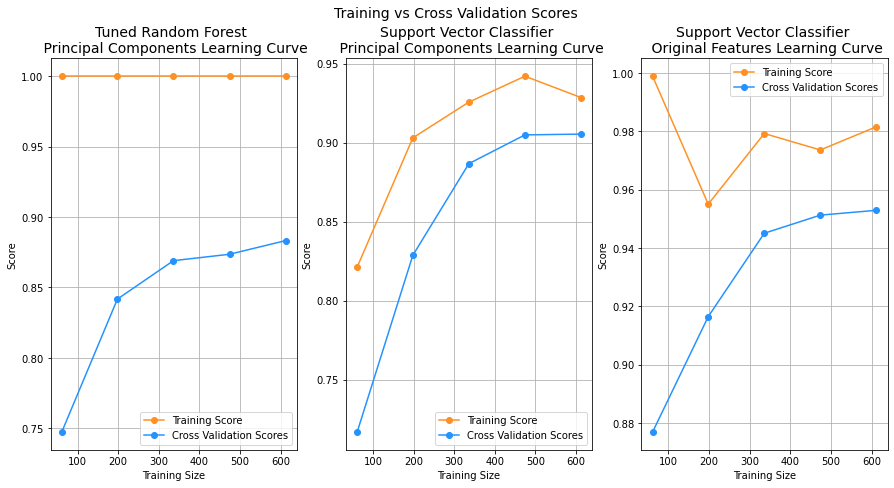

In [50]:
cv = StratifiedKFold(n_splits = 30, shuffle = True, random_state = random_state)

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize = (15,7.2))
fig.suptitle('Training vs Cross Validation Scores', fontsize = 14)

plot_learning_curve(rndm_clf_tuned, X_train_reduced, y_train, cv = cv,  ax = ax1,
                    name = 'Tuned Random Forest \n Principal Components Learning Curve')

plot_learning_curve(svc_grid, X_train_reduced, y_train, cv = cv, ax = ax2, 
                    name = 'Support Vector Classifier \n Principal Components Learning Curve')

plot_learning_curve(grid_svc_f, X_train, y_train, cv = cv, ax = ax3,
                    name = 'Support Vector Classifier \n Original Features Learning Curve')


Observation:
In all three learning curves when the model is trained on very few instances , the validation score is very low because the model is incapable of generalizing properly. Then as the model is shown more training examples , ikt learns and thus the validation score increases. 

If we look at the learning curve of the 'Tuned Random Forest Classifier' , the score on the training data is much higher .There is a large gap between training scores and validation scores. This suggests the model is performing significantly better on training data than on the validation data, which is the hallmark of overfitting model.

For SVC with principal components and SVC with original features both training score and validation score increase with the increase in the size of the training data.

### Conclusions

We built correlation matrix between 'class' variable and other features to check the relationship. There were few features with strong correlation with the target variable.

We implemented PCA on our training data set to reduce the dimensionality of the data. We chose the most important principal components that explain the maximum variance in the dataset.  In our case we reduced the dimension from 18 to 7 and selected those which explained 95% variance.Principal Components are linear combination of original features which makes them less interpretable. Reducing dimensionality does cause some information loss.

We then applied Random Forest and Support Vector Classifier on the reduced features (dimensions) and got average precision score of 74% and 76% , recall score of 77% and 78% , accuracy score of 77% and 78% respectively.. We then also applied SVC on the 18 actual features (with interpretability) and saw an accuracy score of 96%, precision (macro) score of 97% and recall (macro) score of 95%, which is a way better score then SVC when applied on principal components.

Based on learning curve we saw that Random Forest Classifier was overfitting the training set and not performing well on the validation set.For SVC with principal components and SVC with original features both training score and validation score increase with the increase in the size of the training data.